In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

pd.set_option('display.max_columns' , 200)
pd.set_option('display.max_rows' , 200)
warnings.filterwarnings('ignore') #To ignore the warnings

### Task 1: Reading the data

#### SubTask 1.1: read the data and store into dataframe

In [2]:
#Read the appliaction and store it in appData dataframe
leadData =pd.read_csv('C:\\Users\ADMIN\\anaconda3\\Python\\Lead Scoring Assignment\\Leads.csv')
leadData.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

#### Sub Task 1.2: shape of the the data

In [3]:
#data shape 
leadData.shape
#data has 9240 rows and 37 columns

(9240, 37)

#### Sub Task 1.3: inspect the dataframe

In [4]:
# check fot data statstics
leadData.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
#check for datatypes of column
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# check for duplicates
leadData.duplicated().sum()
# we dont have any duplicates in data

0

#### Sub Task 1.4:impute missing values in data

In [7]:
# most of the labels have 'Select' as a value .'Select' indicate that customers intentionaly hasn't choose any option
#so it is much better to replace select with NAN

In [8]:
# get the columns which has 'Select' as value
col_selectValue = []
for i in list(leadData.columns):
    if 'Select' in list(leadData[i].unique()):
        col_selectValue.append(i)
col_selectValue

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [9]:
# replace Select with NAN
leadData['Specialization']= leadData['Specialization'].apply(lambda x:np.nan if x == 'Select' else x)
leadData['How did you hear about X Education']=leadData['How did you hear about X Education'].apply(lambda x:np.nan if x == 'Select' else x)
leadData['Lead Profile']=leadData['Lead Profile'].apply(lambda x:np.nan if x == 'Select' else x)
leadData['City']=leadData['City'].apply(lambda x:np.nan if x == 'Select' else x)
leadData.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

In [10]:
## Dropping columns like 
# 'Prospect ID' : A unique ID with which the customer is identified.
# 'Lead Number':A lead number assigned to each lead procured.
# 'I agree to pay the amount through cheque':column doesn't seem much imp
leadData.drop(columns = ['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque','City'],axis =1,inplace = True)

In [11]:
# storre columns and their null percentage
nullValue_Perc = round(leadData.isnull().sum()/len(leadData)*100,2)
nullValue_Perc = nullValue_Perc[nullValue_Perc>0]
nullValue_Perc

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

In [12]:
# columns having null value grater than 30
nullValue30_Perc = nullValue_Perc[nullValue_Perc>30]
nullValue30_Perc

Specialization                        36.58
How did you hear about X Education    78.46
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [13]:
#drop value having null value >30
col = list(nullValue30_Perc.index)
# lets not remove Specialization
col.remove('Specialization')
leadData.drop(columns = col,axis=1,inplace = True)

In [14]:
# check null values again in dataset
nullValue_Perc = round(leadData.isnull().sum()/len(leadData)*100,2)
nullValue_Perc = nullValue_Perc[nullValue_Perc>0]
nullValue_Perc

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
dtype: float64

In [15]:
# check for 'Lead Source' columns
print(leadData['Lead Source'].value_counts(dropna= False))
# replace nan in Lead Source via 'Others'
leadData['Lead Source'] = leadData['Lead Source'].replace(np.nan,'Others')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


In [16]:
# check for 'Specialization'
print(leadData['Specialization'].value_counts(dropna= False))
#replacing Nan values with "Not Provided"
leadData['Specialization'] = leadData['Specialization'].replace(np.nan,'Unkown')

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [17]:
# In Lead Source' column there is  'google' and 'Google' which is same
leadData['Lead Source'] = leadData['Lead Source'].apply(lambda x:x.capitalize())
print(leadData['Lead Source'].value_counts(dropna= False))

Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Others                 36
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Testone                 1
Youtubechannel          1
Welearnblog_home        1
Nc_edm                  1
Welearn                 1
Pay per click ads       1
Blog                    1
Name: Lead Source, dtype: int64


In [18]:
# replace nan in TotalVisits via most occuring value with most occuring value
leadData['TotalVisits'] = leadData['TotalVisits'].replace(np.nan,leadData['TotalVisits'].mode().values.tolist()[0])
# check for 'TotalVisits' columns
leadData['TotalVisits'].value_counts(dropna= False)

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [19]:
# replace nan in 'Page Views Per Visit' via most occuring value with most occuring value
leadData['Page Views Per Visit'] = leadData['Page Views Per Visit'].replace(np.nan,leadData['Page Views Per Visit'].mode().values.tolist()[0])
# check for 'Page Views Per Visit' columns
leadData['Page Views Per Visit'].value_counts(dropna= False)

0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [20]:
# replace nan in 'Last Activity' via 'Others'
leadData['Last Activity'] = leadData['Last Activity'].replace(np.nan,'Others')
# check for 'Last Activity' columns
print(leadData['Last Activity'].value_counts(dropna= False))

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


In [21]:
#imputing Nan values with mode "What is your current occupation" with most occuring value
leadData['What is your current occupation'] = leadData['What is your current occupation'].replace(np.nan, 'Unemployed')
# check for 'What is your current occupation' columns
print(leadData['What is your current occupation'].value_counts(dropna= False))

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [22]:
# check for 'What matters most to you in choosing a course'
print(leadData['What matters most to you in choosing a course'].value_counts(dropna= False))
# check for 'What matters most to you in choosing a course' columns
leadData['What matters most to you in choosing a course'] = leadData['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [23]:
# check null values again in dataset
leadData.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

### Task 2: Preparing Data for Modelling

#### Task 2.1: Treating categorical columns having binary value

In [24]:
# check for categorical columns having binary value
binary_col = []
for col in list(leadData.columns):
    if 'Yes' in list(leadData[col].unique() ) or 'No' in list(leadData[col].unique() ):
        binary_col.append(col)
binary_col

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'A free copy of Mastering The Interview']

In [25]:
# convert yes and No to 1 and 0 respectively
for i in binary_col:
    leadData[i] = leadData[i].map({'Yes':1,'No':0})
leadData.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark chat             0            0   
1                      API  Organic search             0            0   
2  Landing Page Submission  Direct traffic             0            0   
3  Landing Page Submission  Direct traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Unkown   
1             Email Opened                   Unkown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Unkown   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

#### Task 2.2: Creating Dummy variables

In [26]:
# Creating a dummy variables dropping the first level.
dummies = pd.get_dummies(leadData[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Specialization','Last Notable Activity','What matters most to you in choosing a course']],drop_first = True)
# add new columns to extsting dataframe
leadData =pd.concat([leadData,dummies],axis=1)
# drop repeated and duplicate columns 
leadData.drop(columns=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization','What is your current occupation','What matters most to you in choosing a course'],axis =1,inplace = True)
# display new data
leadData.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Blog  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                 

#### Task 2.3: Check for outliers

In [27]:
round(leadData.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)
# we can see outlies for totalVistis ,Timespent on website and page views per visit

Do Not Email  Do Not Call  Converted  TotalVisits  \
count       9240.00      9240.00    9240.00      9240.00   
mean           0.08         0.00       0.39         3.39   
std            0.27         0.01       0.49         4.84   
min            0.00         0.00       0.00         0.00   
15%            0.00         0.00       0.00         0.00   
35%            0.00         0.00       0.00         2.00   
50%            0.00         0.00       0.00         3.00   
55%            0.00         0.00       0.00         3.00   
75%            0.00         0.00       1.00         5.00   
95%            1.00         0.00       1.00        10.00   
max            1.00         1.00       1.00       251.00   

       Total Time Spent on Website  Page Views Per Visit   Search  Magazine  \
count                      9240.00               9240.00  9240.00    9240.0   
mean                        487.70                  2.33     0.00       0.0   
std                         548.02                  2.16     0.04       0.0   
min                           0.00                  0.00     0.00       0.0   
15%                           0.00                  0.00     0.00       0.0   
35%                          98.00                  1.50     0.00       0.0   
50%                         248.00                  2.00     0.00       0.0   
55%                         305.00                  2.00     0.00       0.0   
75%                         936.00                  3.00     0.00       0.0   
95%                        1562.00                  6.00     0.00       0.0   
max                        2272.00                 55.00     1.00       0.0   

       Newspaper Article  X Education Forums  Newspaper  \
count            9240.00             9240.00    9240.00   
mean                0.00                0.00       0.00   
std                 0.01                0.01       0.01   
min                 0.00                0.00       0.00   
15%                 0.00                0.00       0.00   
35%                 0.00                0.00       0.00   
50%                 0.00                0.00       0.00   
55%                 0.00                0.00       0.00   
75%                 0.00                0.00       0.00   
95%                 0.00                0.00       0.00   
max                 1.00                1.00       1.00   

       Digital Advertisement  Through Recommendations  \
count                9240.00                  9240.00   
mean                    0.00                     0.00   
std                     0.02                     0.03   
min                     0.00                     0.00   
15%                     0.00                     0.00   
35%                     0.00                     0.00   
50%                     0.00                     0.00   
55%                     0.00                     0.00   
75%                     0.00                     0.00   
95%                     0.00                     0.00   
max                     1.00                     1.00   

       Receive More Updates About Our Courses  \
count                                  9240.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
15%                                       0.0   
35%                                       0.0   
50%                                       0.0   
55%                                       0.0   
75%                                       0.0   
95%                                       0.0   
max                                       0.0   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9240.0                     9240.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   

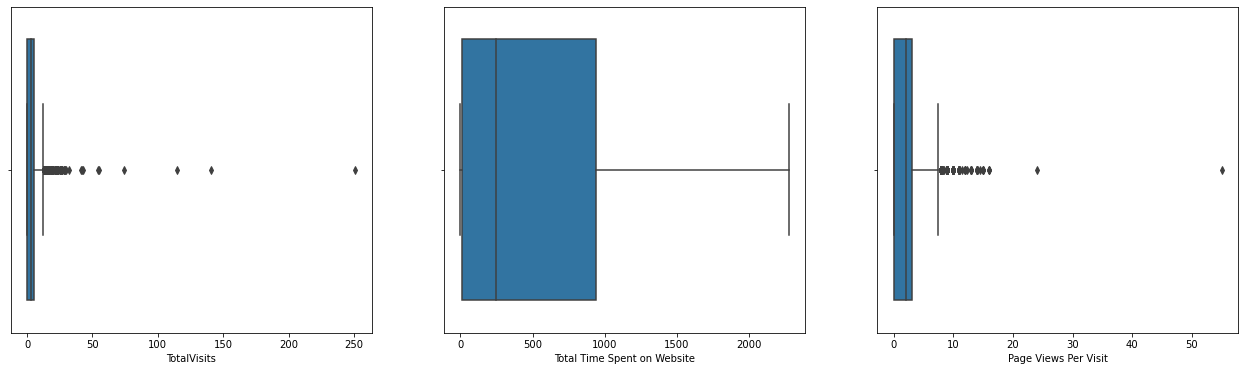

In [28]:
#Visvalization of outliers
col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
fig,axis= plt.subplots(1,3,figsize=(22,6),sharey =True)
for i in range(3):
    sns.boxplot(data = leadData,x=leadData[col[i]],ax=axis[i])

#### Task 2.4: Treating outliers

In [29]:
# As we have range from 0 to 251 for'TotalVisits' variable
ranges_total_visits={'TotalVisits_0to50': 50,'TotalVisits_50to100': 100,'TotalVisits_100to150': 150,
                     'TotalVisits_150to200' : 200,'TotalVisits_200to250': 250,'TotalVisits_250to300': 300}
# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits.keys()))):
    leadData[list(ranges_total_visits.keys())[i]]=leadData['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [30]:
# As we have range from 0 to 55 for'Page Views Per Visit' variable
ranges_total_visits_1={'Page Views Per Visit_0to10': 10,'Page Views Per Visit_10to20': 20,'Page Views Per Visit_20to30': 30,
                     'Page Views Per Visit_30to40' : 40,'Page Views Per Visit_40to50': 50,'Page Views Per Visit_50to60': 60}
# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits_1.keys()))):
    leadData[list(ranges_total_visits_1.keys())[i]]=leadData['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

In [31]:
#drop redudant columns
col=['TotalVisits','Page Views Per Visit','TotalVisits_150to200','Page Views Per Visit_30to40']

leadData.drop(columns = col,axis =1,inplace = True)
leadData.head()

Do Not Email  Do Not Call  Converted  Total Time Spent on Website  Search  \
0             0            0          0                            0       0   
1             0            0          0                          674       0   
2             0            0          1                         1532       0   
3             0            0          0                          305       0   
4             0            0          1                         1428       0   

   Magazine  Newspaper Article  X Education Forums  Newspaper  \
0         0                  0                   0          0   
1         0                  0                   0          0   
2         0                  0                   0          0   
3         0                  0                   0          0   
4         0                  0                   0          0   

   Digital Advertisement  Through Recommendations  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   Receive More Updates About Our Courses  Update me on Supply Chain Content  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Get updates on DM Content  A free copy of Mastering The Interview  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       1   
3                          0                                       0   
4                          0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Blog  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark chat  Lead Source_Organic search  Lead Source_Others  \
0                       1                           0            

#### Task 2.5: check for correlation of features with target variable

In [32]:
# lets check for column which has highest correlation with the target variable
df_corr = leadData.corr()
df_corr = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
df_corr = df_corr.sort_values(by=0, ascending=False)
df_corr = df_corr[(df_corr['level_0'] == 'Converted') | (df_corr['level_1'] == 'Converted')]
df_corr.dropna(inplace = True)
df_corr.head(10) # top 10 correlations

level_0    level_1         0
320                         Total Time Spent on Website  Converted  0.362483
9542                     Last Notable Activity_SMS Sent  Converted  0.351845
5408                             Last Activity_SMS Sent  Converted  0.325600
1698                          Lead Origin_Lead Add Form  Converted  0.321702
6362  What is your current occupation_Working Profes...  Converted  0.313837
3288                              Lead Source_Reference  Converted  0.270830
3924                       Lead Source_Welingak website  Converted  0.154153
5090                               Last Activity_Others  Converted  0.087484
7422                Specialization_Marketing Management  Converted  0.065853
2970                                 Lead Source_Others  Converted  0.053993

In [33]:
#visvualize correlation
plt.figure(figsize=(16,12))
sns.heatmap(leadData.corr(),cmap ='Greens')

<AxesSubplot:>

### Task 3: Data Preparation

#### Task 3.1:Train-Test Split

In [34]:
# split the data into test and train
df_train,df_test = train_test_split(leadData,test_size = .30,random_state = 100)
y_train = df_train.pop('Converted')
X_train = df_train
y_test = df_test.pop('Converted')
X_test = df_test

In [35]:
# scalling of independent variables
scaler=StandardScaler() 
X_train['Total Time Spent on Website'] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

### TASK 4:Building a Model

#### Sub Task 4.1: RFE for feature selection

In [36]:
# RFE to find best feature
# building in object
logm=LogisticRegression()
# Running rfe for 18 variables
rfem = RFE(logm,18)
rfem = rfem.fit(X_train,y_train)
# selecting columns only which are 'True'
col=X_train.columns[rfem.support_]
X_train=sm.add_constant(X_train[col])
print(list(X_train.columns))

['const', 'Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'What is your current occupation_Housewife', 'What is your current occupation_Working Professional', 'Specialization_Hospitality Management', 'Specialization_Unkown', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable']


#### Sub Task 4.2: Build Logistic Model

In [37]:
# creating model with  selected features
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.8
Date:                Wed, 11 Aug 2021   Deviance:                       5343.6
Time:                        22:15:02   Pearson chi2:                 7.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0701      0.113      0.621      0.535      -0.151       0.291
Do Not Email                                            -1.1188      0.190     -5.884      0.000      -1.491      -0.746
Total Time Spent on Website                              0.9736      0.036     26.777      0.000       0.902       1.045
Lead Origin_Landing Page Submission                     -1.4481      0.120    -12.066      0.000      -1.683      -1.213
Lead Origin_Lead Add Form                                2.8430      0.208     13.670      0.000       2.435       3.251
Lead Source_Welingak website                             2.4206      0.746      3.245      0.001       0.959       3.882
Last Activity_Converted to Lead                         -1.3115      0.214     -6.142      0.000      -1.730      -0.893
Last Activity_Email Bounced                             -1.4205      0.421     -3.372      0.001      -2.246      -0.595
Last Activity_Had a Phone Conversation                   0.3058      0.950      0.322      0.748      -1.556       2.168
Last Activity_Olark Chat Conversation                   -1.1566      0.168     -6.898      0.000      -1.485      -0.828
Last Activity_Others                                    -1.5613      0.429     -3.643      0.000      -2.401      -0.721
What is your current occupation_Housewife               22.8838   1.36e+04      0.002      0.999   -2.66e+04    2.67e+04
What is your current occupation_Working Professional     2.6486      0.191     13.840      0.000       2.274       3.024
Specialization_Hospitality Management                   -0.9863      0.328     -3.006      0.003      -1.629      -0.343
Specialization_Unkown                                   -1.0961      0.121     -9.024      0.000      -1.334      -0.858
Last Notable Activity_Email Bounced                      1.7690      0.604      2.931      0.003       0.586       2.952
Last Notable Activity_Had a Phone Conversation           2.9816      1.458      2.045      0.041       0.124       5.839
Last Notable Activity_SMS Sent                           1.5044      0.079     18.982      0.000       1.349       1.660
Last Notable Activity_Unreachable                        1.5412      0.515      2.993      0.003       0.532       2.551
========================================================================================================================
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# define function for VIF
def vifCalcultor(df):
# creating dataFrame
    vif=pd.DataFrame()
    vif['Features']=df.columns  
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif  

In [39]:
# check for VIF
vifCalcultor(X_train)
# VIF looks good for all the columns as it is less than 5

Features    VIF
0                                               const  11.76
3                 Lead Origin_Landing Page Submission   3.09
14                              Specialization_Unkown   2.99
8              Last Activity_Had a Phone Conversation   2.01
16     Last Notable Activity_Had a Phone Conversation   2.00
7                         Last Activity_Email Bounced   1.88
4                           Lead Origin_Lead Add Form   1.76
1                                        Do Not Email   1.69
5                        Lead Source_Welingak website   1.27
9               Last Activity_Olark Chat Conversation   1.24
15                Last Notable Activity_Email Bounced   1.20
2                         Total Time Spent on Website   1.18
10                               Last Activity_Others   1.15
12  What is your current occupation_Working Profes...   1.15
17                     Last Notable Activity_SMS Sent   1.13
6                     Last Activity_Converted to Lead   1.04
11          What is your current occupation_Housewife   1.01
13              Specialization_Hospitality Management   1.01
18                  Last Notable Activity_Unreachable   1.00

In [40]:
#drop column 'What is your current occupation_Housewife' as it has p value >.05
X_train.drop(columns = 'What is your current occupation_Housewife',axis =1,inplace = True)
# creating model 
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.7
Date:                Wed, 11 Aug 2021   Deviance:                       5357.4
Time:                        22:15:03   Pearson chi2:                 7.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0758      0.113      0.672      0.502      -0.145       0.297
Do Not Email                                            -1.1238      0.190     -5.912      0.000      -1.496      -0.751
Total Time Spent on Website                              0.9728      0.036     26.782      0.000       0.902       1.044
Lead Origin_Landing Page Submission                     -1.4434      0.120    -12.036      0.000      -1.678      -1.208
Lead Origin_Lead Add Form                                2.8557      0.208     13.743      0.000       2.448       3.263
Lead Source_Welingak website                             2.4052      0.746      3.225      0.001       0.944       3.867
Last Activity_Converted to Lead                         -1.3174      0.213     -6.172      0.000      -1.736      -0.899
Last Activity_Email Bounced                             -1.4248      0.421     -3.381      0.001      -2.251      -0.599
Last Activity_Had a Phone Conversation                   0.3000      0.950      0.316      0.752      -1.562       2.162
Last Activity_Olark Chat Conversation                   -1.1595      0.168     -6.917      0.000      -1.488      -0.831
Last Activity_Others                                    -1.5484      0.426     -3.631      0.000      -2.384      -0.713
What is your current occupation_Working Professional     2.6419      0.191     13.806      0.000       2.267       3.017
Specialization_Hospitality Management                   -0.9927      0.328     -3.026      0.002      -1.636      -0.350
Specialization_Unkown                                   -1.1002      0.121     -9.064      0.000      -1.338      -0.862
Last Notable Activity_Email Bounced                      1.7730      0.604      2.937      0.003       0.590       2.956
Last Notable Activity_Had a Phone Conversation           2.9773      1.458      2.042      0.041       0.120       5.835
Last Notable Activity_SMS Sent                           1.4972      0.079     18.907      0.000       1.342       1.652
Last Notable Activity_Unreachable                        1.5334      0.515      2.978      0.003       0.524       2.543
========================================================================================================================
"""

In [41]:
# check for VIF
vifCalcultor(X_train)
# VIF looks good for all the columns as it is less than 5

Features    VIF
0                                               const  11.75
3                 Lead Origin_Landing Page Submission   3.09
13                              Specialization_Unkown   2.99
8              Last Activity_Had a Phone Conversation   2.01
15     Last Notable Activity_Had a Phone Conversation   2.00
7                         Last Activity_Email Bounced   1.88
4                           Lead Origin_Lead Add Form   1.76
1                                        Do Not Email   1.69
5                        Lead Source_Welingak website   1.27
9               Last Activity_Olark Chat Conversation   1.24
14                Last Notable Activity_Email Bounced   1.20
2                         Total Time Spent on Website   1.18
10                               Last Activity_Others   1.15
11  What is your current occupation_Working Profes...   1.15
16                     Last Notable Activity_SMS Sent   1.13
6                     Last Activity_Converted to Lead   1.04
12              Specialization_Hospitality Management   1.01
17                  Last Notable Activity_Unreachable   1.00

In [42]:
#drop column 'Last Activity_Had a Phone Conversation'  Form as it has p value >.05
X_train.drop(columns = 'Last Activity_Had a Phone Conversation',axis =1,inplace = True)
# creating model
logm=sm.GLM(y_train,X_train,family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.7
Date:                Wed, 11 Aug 2021   Deviance:                       5357.5
Time:                        22:15:03   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0762      0.113      0.675      0.500      -0.145       0.297
Do Not Email                                            -1.1237      0.190     -5.910      0.000      -1.496      -0.751
Total Time Spent on Website                              0.9731      0.036     26.802      0.000       0.902       1.044
Lead Origin_Landing Page Submission                     -1.4434      0.120    -12.036      0.000      -1.678      -1.208
Lead Origin_Lead Add Form                                2.8567      0.208     13.750      0.000       2.450       3.264
Lead Source_Welingak website                             2.4041      0.746      3.224      0.001       0.943       3.866
Last Activity_Converted to Lead                         -1.3182      0.213     -6.176      0.000      -1.737      -0.900
Last Activity_Email Bounced                             -1.4261      0.422     -3.383      0.001      -2.252      -0.600
Last Activity_Olark Chat Conversation                   -1.1602      0.168     -6.921      0.000      -1.489      -0.832
Last Activity_Others                                    -1.5501      0.426     -3.635      0.000      -2.386      -0.714
What is your current occupation_Working Professional     2.6435      0.191     13.821      0.000       2.269       3.018
Specialization_Hospitality Management                   -0.9933      0.328     -3.028      0.002      -1.636      -0.350
Specialization_Unkown                                   -1.0999      0.121     -9.062      0.000      -1.338      -0.862
Last Notable Activity_Email Bounced                      1.7733      0.604      2.938      0.003       0.590       2.956
Last Notable Activity_Had a Phone Conversation           3.2771      1.107      2.961      0.003       1.108       5.446
Last Notable Activity_SMS Sent                           1.4966      0.079     18.904      0.000       1.341       1.652
Last Notable Activity_Unreachable                        1.5330      0.515      2.977      0.003       0.524       2.542
========================================================================================================================
"""

In [43]:
# check for VIF
vifCalcultor(X_train)
# VIF looks good for all the columns as it is less than 5

Features    VIF
0                                               const  11.75
3                 Lead Origin_Landing Page Submission   3.09
12                              Specialization_Unkown   2.99
7                         Last Activity_Email Bounced   1.88
4                           Lead Origin_Lead Add Form   1.76
1                                        Do Not Email   1.69
5                        Lead Source_Welingak website   1.27
8               Last Activity_Olark Chat Conversation   1.24
13                Last Notable Activity_Email Bounced   1.20
2                         Total Time Spent on Website   1.18
9                                Last Activity_Others   1.15
10  What is your current occupation_Working Profes...   1.15
15                     Last Notable Activity_SMS Sent   1.12
6                     Last Activity_Converted to Lead   1.04
11              Specialization_Hospitality Management   1.01
14     Last Notable Activity_Had a Phone Conversation   1.00
16                  Last Notable Activity_Unreachable   1.00

In [44]:
#drop column 'const'  Form as it has p value >.05
X_train.drop(columns = 'const',axis =1,inplace = True)
# creating model
logm=sm.GLM(y_train,X_train,family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.0
Date:                Wed, 11 Aug 2021   Deviance:                       5357.9
Time:                        22:15:03   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.1195      0.190     -5.892      0.000      -1.492      -0.747
Total Time Spent on Website                              0.9733      0.036     26.830      0.000       0.902       1.044
Lead Origin_Landing Page Submission                     -1.3719      0.056    -24.470      0.000      -1.482      -1.262
Lead Origin_Lead Add Form                                2.8935      0.200     14.449      0.000       2.501       3.286
Lead Source_Welingak website                             2.3743      0.744      3.190      0.001       0.915       3.833
Last Activity_Converted to Lead                         -1.3097      0.213     -6.147      0.000      -1.727      -0.892
Last Activity_Email Bounced                             -1.4245      0.422     -3.379      0.001      -2.251      -0.598
Last Activity_Olark Chat Conversation                   -1.1426      0.165     -6.913      0.000      -1.467      -0.819
Last Activity_Others                                    -1.5423      0.427     -3.615      0.000      -2.378      -0.706
What is your current occupation_Working Professional     2.6555      0.190     13.972      0.000       2.283       3.028
Specialization_Hospitality Management                   -0.9802      0.327     -2.998      0.003      -1.621      -0.339
Specialization_Unkown                                   -1.0321      0.068    -15.178      0.000      -1.165      -0.899
Last Notable Activity_Email Bounced                      1.7765      0.603      2.947      0.003       0.595       2.958
Last Notable Activity_Had a Phone Conversation           3.2898      1.106      2.976      0.003       1.123       5.457
Last Notable Activity_SMS Sent                           1.5036      0.078     19.166      0.000       1.350       1.657
Last Notable Activity_Unreachable                        1.5497      0.513      3.018      0.003       0.543       2.556
========================================================================================================================
"""

In [45]:
# check for VIF
vifCalcultor(X_train)
# VIF looks good for all the columns as it is less than 5

Features   VIF
6                         Last Activity_Email Bounced  1.95
0                                        Do Not Email  1.83
3                           Lead Origin_Lead Add Form  1.57
11                              Specialization_Unkown  1.56
2                 Lead Origin_Landing Page Submission  1.44
14                     Last Notable Activity_SMS Sent  1.44
7               Last Activity_Olark Chat Conversation  1.34
4                        Lead Source_Welingak website  1.26
12                Last Notable Activity_Email Bounced  1.21
1                         Total Time Spent on Website  1.18
9   What is your current occupation_Working Profes...  1.18
8                                Last Activity_Others  1.16
5                     Last Activity_Converted to Lead  1.09
10              Specialization_Hospitality Management  1.02
13     Last Notable Activity_Had a Phone Conversation  1.00
15                  Last Notable Activity_Unreachable  1.00

#### Sub Task 4.3: Predicting a Train model

In [46]:
log_model = logm.fit()
y_train_pred= log_model.predict(X_train)
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_probability':y_train_pred,'ID':y_train.index})
y_train_pred_final.head()

Converted  Conversion_probability    ID
1871          0                0.296973  1871
6795          0                0.083293  6795
3516          0                0.153807  3516
8105          0                0.811615  8105
3934          0                0.130809  3934

#### Sub Task 4.4: ROC Curve Plotting

In [47]:
#define function for ROC
def rocCurve( target_var, probability ):
    fpr, tpr, thresholds = roc_curve( target_var, probability,drop_intermediate = False )   
    auc = roc_auc_score( target_var, probability )    
    plt.figure(figsize=(12, 6))
    plt.plot([0, 1], [0, 1], 'g--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc )
    plt.legend()
    plt.show()

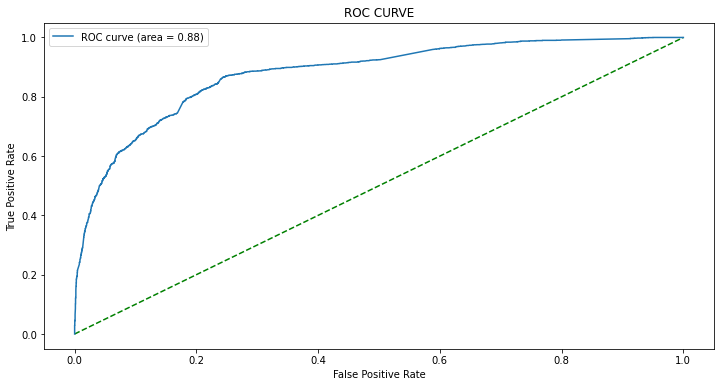

In [48]:
# plot roc curve
rocCurve(y_train_pred_final.Converted, y_train_pred_final.Conversion_probability)
# The area under the curve is 88% 

#### Sub Task 4.5: Cutoff Point

In [49]:
#predict target value on the basis of cutoff point
cutOffPoint=[float(x)/10 for x in range(10)]
for i in cutOffPoint:
    y_train_pred_final[i]=y_train_pred_final['Conversion_probability'].map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_probability    ID  0.0  0.1  0.2  0.3  0.4  0.5  \
1871          0                0.296973  1871    1    1    1    0    0    0   
6795          0                0.083293  6795    1    0    0    0    0    0   
3516          0                0.153807  3516    1    1    0    0    0    0   
8105          0                0.811615  8105    1    1    1    1    1    1   
3934          0                0.130809  3934    1    1    0    0    0    0   

      0.6  0.7  0.8  0.9  
1871    0    0    0    0  
6795    0    0    0    0  
3516    0    0    0    0  
8105    1    1    1    0  
3934    0    0    0    0

In [50]:
# Create function to calculate  sensitivity ,accuracy and specificity for different cutoffs
def logModelMetrics(cutOffPoint,y_pred):
    col=['Probability','Sensitvity','Accuracy','Specificity']
    df_Metrics=pd.DataFrame(columns = col)
    for i in cutOffPoint:
        confusion_metrics = confusion_matrix(y_pred['Converted'],y_pred[i])
        accuracy= round((confusion_metrics[0,0]+confusion_metrics[1,1])/(confusion_metrics[0,0]+confusion_metrics[0,1]+confusion_metrics[1,0]+confusion_metrics[1,1]),2)
        sensitivity=round(confusion_metrics[1,1]/(confusion_metrics[1,0]+confusion_metrics[1,1]),2)
        specificity=round(confusion_metrics[0,0]/(confusion_metrics[0,0]+confusion_metrics[0,1]),2)
        df_Metrics.loc[i]=[i, accuracy, sensitivity, specificity]
    return df_Metrics

In [51]:
#call function logModelMetrics 
df_Metrics= logModelMetrics(cutOffPoint,y_train_pred_final)
df_Metrics.head(10)

Probability  Sensitvity  Accuracy  Specificity
0.0          0.0        0.38      1.00         0.00
0.1          0.1        0.56      0.98         0.30
0.2          0.2        0.77      0.89         0.69
0.3          0.3        0.80      0.85         0.76
0.4          0.4        0.81      0.78         0.82
0.5          0.5        0.81      0.67         0.89
0.6          0.6        0.81      0.60         0.93
0.7          0.7        0.79      0.52         0.95
0.8          0.8        0.76      0.42         0.97
0.9          0.9        0.72      0.27         0.99

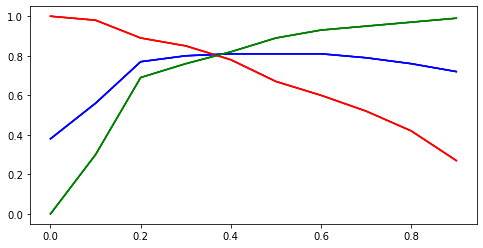

In [52]:
#plot graphn for finding optimal cutoff
plt.figure(figsize =(8,4))
for i in ['Sensitvity','Accuracy','Specificity']:
    plt.plot(df_Metrics['Probability'], df_Metrics['Sensitvity'], label = "line 1",color = 'blue')
    plt.plot(df_Metrics['Probability'], df_Metrics['Accuracy'], label = "line 1",color = 'red')
    plt.plot(df_Metrics['Probability'], df_Metrics['Specificity'], label = "line 1",color ='green')
plt.show()
#it's lie between .2 and .4
#Lets go ahead with .3 as a cutoff

In [53]:
#Lets drop other column expect .35 from y_train_pred_final and prepare dataFrame for predicted value and probablity
y_train_pred_final['Predicted'] = y_train_pred_final[0.3]
y_train_pred_final.drop(columns = cutOffPoint,inplace = True)
y_train_pred_final.head()

Converted  Conversion_probability    ID  Predicted
1871          0                0.296973  1871          0
6795          0                0.083293  6795          0
3516          0                0.153807  3516          0
8105          0                0.811615  8105          1
3934          0                0.130809  3934          0

In [54]:
# calculate metrics Sensitivity and specificity
confusion_metrics = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
sensitivity=round(confusion_metrics[1,1]/(confusion_metrics[1,0]+confusion_metrics[1,1]),2)
specificity=round(confusion_metrics[0,0]/(confusion_metrics[0,0]+confusion_metrics[0,1]),2)
print('sensitivity is :',sensitivity, '\nspecificity is :',specificity)

sensitivity is : 0.85 
specificity is : 0.76


In [55]:
# calculate metrics accuracy and Precision
print('Precision score',round(precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2))
print('accuracy score',round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2))
print('Recall score ',round(recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2))

Precision score 0.69
accuracy score 0.8
Recall score  0.85


### Task 5: Predicting a Test model

In [56]:
# standard scalling for otal Time Spent on Website
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])
# update X_test for selected column
X_test = sm.add_constant(X_test)
X_test = X_test[list(X_train.columns)]
#predict target value for test data
y_pred_test = log_model.predict(X_test)

In [57]:
# build dtaframe for predicted value and probablity
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Conversion_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final['Predicted']=y_test_pred_final['Conversion_Probability'].map(lambda x:1 if x >0.3 else 0 )
y_test_pred_final.head()

Converted  Conversion_Probability    ID  Predicted
4269          1                0.803822  4269          1
2376          1                0.924371  2376          1
7766          1                0.969184  7766          1
9199          0                0.045806  9199          0
4359          1                0.884085  4359          1

In [58]:
# calculate metrics Sensitivity and specificity
confusion_metrics = confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
sensitivity=round(confusion_metrics[1,1]/(confusion_metrics[1,0]+confusion_metrics[1,1]),2)
specificity=round(confusion_metrics[0,0]/(confusion_metrics[0,0]+confusion_metrics[0,1]),2)
print('sensitivity is :',sensitivity, '\nspecificity is :',specificity)

sensitivity is : 0.85 
specificity is : 0.77


In [59]:
# calculate metrics accuracy and Precision
print('Precision score',round(precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted),2))
print('accuracy score',round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted),2))
print('Recall score ',round(recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted),2))

Precision score 0.71
accuracy score 0.8
Recall score  0.85


#### Sub Task 5.1: Lead Score assigning

In [60]:
y_test_pred_final['Lead Number']=leadData.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Conversion_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

Converted  Conversion_Probability    ID  Predicted  Lead Number  \
4269          1                0.803822  4269          1            0   
2376          1                0.924371  2376          1            0   
7766          1                0.969184  7766          1            0   
9199          0                0.045806  9199          0            0   
4359          1                0.884085  4359          1            0   

      Lead Score  
4269          80  
2376          92  
7766          97  
9199           5  
4359          88

### KEY OBSERVATIONS:
1. We have accuracy around 80% for train and test
2. We have sensitivity around 85% which is is more than required conversion rate to be around 80%.
4. Important features for getting good conversion rate :
    1. Last Notable Activity_Had a Phone Conversation
    2. Lead Origin_Lead Add Form 
    3. What is your current occupation_Working Professional
    4. Lead Source_Welingak website
5. Features having -ive effect on conversion rate:
    1. Last Activity_Email Bounced
    2. Do Not Email